### **공통 라이브러리 및 드라이브 연동**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt 
import math
import cv2
impath = '/content/drive/My Drive/Colab_Notebooks/Image_processing/image/lena.bmp'
impath2 = '/content/drive/My Drive/Colab_Notebooks/Image_processing/image/pepper.bmp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1번 Design a function to compute an integral image**

[[     144      288      434 ...    59928    60062    60170]
 [     288      576      868 ...   119856   120124   120340]
 [     432      864     1302 ...   179784   180186   180510]
 ...
 [   41311    82622   124225 ... 28664763 28724605 28784615]
 [   41350    82700   124351 ... 28717371 28777300 28837399]
 [   41389    82778   124477 ... 28769979 28829995 28890183]]


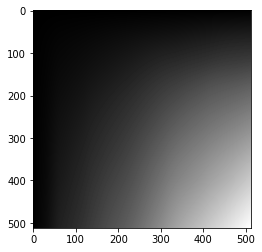

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

def integral(img):
    
    table = np.zeros_like(img).astype(int)

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):

            if (row > 0) and (col > 0):
                table[row, col] = (img[row, col] +
                                   table[row, col - 1] +
                                   table[row - 1, col] -
                                   table[row - 1, col - 1])
            elif row > 0:   
                table[row, col] = img[row, col] + table[row - 1, col]
            elif col > 0:
                table[row, col] = img[row, col] + table[row, col - 1]
            else:
                table[row, col] = img[row, col]

    return table

img = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)
img2 = integral(img)
print(img2)
plt.imshow(img2, cmap="gray")

[[     144      288      434 ...    59928    60062    60170]
 [     288      576      868 ...   119856   120124   120340]
 [     432      864     1302 ...   179784   180186   180510]
 ...
 [   41311    82622   124225 ... 28664763 28724605 28784615]
 [   41350    82700   124351 ... 28717371 28777300 28837399]
 [   41389    82778   124477 ... 28769979 28829995 28890183]]


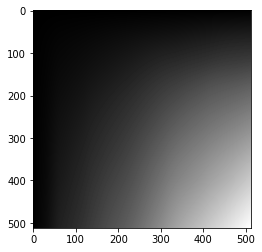

In [ ]:
def compute_integral(image):
    col,row = image.shape
    integral_image = np.zeros((col,row),dtype='int')
    for i in range(col):
        for j in range(row):
            integral_image[i,j] = np.sum(image[:i+1,:j+1])
    return integral_image
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image read
integral_image = compute_integral(image)
print(integral_image)
plt.imshow(integral_image,cmap='gray')

### **2번 Design a filter with only addition and subtraction by using integral image**



> box_filter 생성



In [ ]:
box_filter1 = np.ones((8,8),dtype='int')
box_filter1[:,4:] = -1

box_filter2 = np.ones((8,8),dtype='int')
box_filter2[4:,:] = -1

box_filter3 = np.ones((8,8),dtype='int')
box_filter3[:4,4:] = -1
box_filter3[4:,:4] = -1

box_filter4 = np.ones((8,8),dtype='int')
box_filter4[:,2:6] = -2



> filter 적용



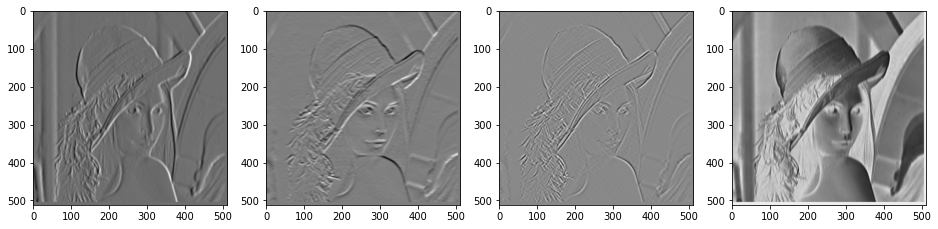

In [ ]:
def integral_filtering1(integral_image,box_filter):
    row,col = integral_image.shape
    k = box_filter.shape[0]
    filtered = np.zeros((row,col))
    for i in range(row-k):
        for j in range(col-k):
            temp =  integral_image[i:i+k,j:j+k]*box_filter
            ''' A+B-C-D '''
            filtered[i,j] = temp[0,0] + temp[7,3] - temp[0,3] - temp[7,0] 
            filtered[i,j] += temp[0,4] + temp[7,7] - temp[0,7] - temp[7,4]
    return filtered

def integral_filtering2(integral_image,box_filter):
    row,col = integral_image.shape
    k = box_filter.shape[0]
    filtered = np.zeros((row,col))
    for i in range(row-k):
        for j in range(col-k):
            temp =  integral_image[i:i+k,j:j+k]*box_filter
            ''' A+B-C-D '''
            filtered[i,j] = temp[0,0] + temp[3,7] - temp[0,7] - temp[3,0] 
            filtered[i,j] += temp[4,0] + temp[7,7] - temp[4,7] - temp[7,0]
    return filtered

def integral_filtering3(integral_image,box_filter):
    row,col = integral_image.shape
    k = box_filter.shape[0]
    filtered = np.zeros((row,col))
    for i in range(row-k):
        for j in range(col-k):
            temp =  integral_image[i:i+k,j:j+k]*box_filter
            ''' A+B-C-D '''
            filtered[i,j] = temp[0,0] + temp[3,3] - temp[0,3] - temp[3,0]
            filtered[i,j] += temp[0,4] + temp[3,7] - temp[0,7] - temp[3,4]
            filtered[i,j] += temp[4,0] + temp[7,3] - temp[4,3] - temp[7,0]
            filtered[i,j] += temp[4,4] + temp[7,7] - temp[4,7] - temp[7,4]
    return filtered

def integral_filtering4(integral_image,box_filter):
    row,col = integral_image.shape
    k = box_filter.shape[0]
    filtered = np.zeros((row,col))
    for i in range(row-k):
        for j in range(col-k):
            temp =  integral_image[i:i+k,j:j+k]*box_filter
            ''' A+B-C-D '''
            filtered[i,j] = temp[0,0] + temp[7,1] - temp[0,1] - temp[7,0]
            filtered[i,j] += temp[0,2] + temp[7,5] - temp[0,5] - temp[7,2]
            filtered[i,j] += temp[0,6] + temp[7,7] - temp[0,7] - temp[7,6]
    return filtered

filtered_image1 = integral_filtering1(integral_image,box_filter1)
filtered_image2 = integral_filtering2(integral_image,box_filter2)
filtered_image3 = integral_filtering3(integral_image,box_filter3)
filtered_image4 = integral_filtering4(integral_image,box_filter4)

plt.figure(figsize=(16, 8))
plt.subplot(1,4,1)
plt.imshow(filtered_image1,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(filtered_image2,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(filtered_image3,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(filtered_image4,cmap='gray')

### **3번 Design a filter for k-means algorithm, and apply it to the image**



> kmeans iterations version



[[195 224 187]
 [187 194  76]
 [176 197  75]
 [137  88  49]
 [198 202  64]
 [115 183 102]]
0
[[189 213 176]
 [193 192  93]
 [164 189  85]
 [143  49  34]
 [200 199  71]
 [124 171  87]]
1
[[187 212 175]
 [191 193 100]
 [160 188  87]
 [145  40  31]
 [195 193  73]
 [120 159  77]]
2
[[187 213 176]
 [189 197 105]
 [153 187  90]
 [146  38  31]
 [192 186  74]
 [118 150  71]]
3
[[187 213 178]
 [186 202 105]
 [145 185  91]
 [147  37  30]
 [189 179  76]
 [117 143  68]]
4
[[188 213 179]
 [184 204 102]
 [139 182  91]
 [147  36  30]
 [186 172  76]
 [115 137  64]]


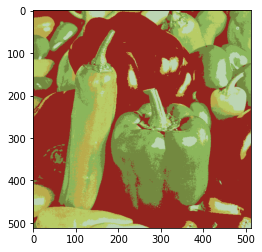

In [ ]:
def kmeans(image,k,iterations):
    row,col,ch = image.shape
    kmeans_image = image.astype('double')
    n = row*col
    x = kmeans_image.reshape((n,3)) # R G B만 고려하기 위해 reshape
    z = np.zeros((k,3),dtype='int') # k centroids
    for i in range(k):
        rand = np.random.randint(0,n)
        z[i,:] = x[rand,:] # 초기화
    print(z)
    x_index = np.zeros(n)
    x_before = np.zeros(n)
    distance = np.zeros(k)
    
    a = 0
    for a in range(iterations):
        print(a)
        # 각 픽셀과 모든 군집 간 거리 구하고 최소 거리의 군집에 할당
        for i in range(n):
            for j in range(k):
                distance[j] = np.sqrt(np.sum((x[i,:] - z[j,:])**2)) # 거리 계산
            x_index[i] = np.argmin(distance) # 최소 거리를 해당 군집으로 배정

        #이전과 똑같으면 종료
        if (x_index.tolist() == x_before.tolist()):
            break;
        x_before = x_index + 0

        for i in range(k):
            xii = np.where(x_index == i)
            sumr,sumg,sumb = 0,0,0
            for j in range(np.size(xii[0])):
                sumr += x[xii[0][j],0]
                sumg += x[xii[0][j],1]
                sumb += x[xii[0][j],2]
            z[i,0],z[i,1],z[i,2] = sumr/np.size(xii[0]),sumg/np.size(xii[0]),sumb/np.size(xii[0])
        print(z)
        a = a+1

    # 군집 대표 RGB로 속한 픽셀 모두 채우기
    x = x.reshape((row,col,3))
    x_index = x_index.reshape((row,col))
    for i in range(k):
        xii = np.where(x_index == i)
        for j in range(np.size(xii[0])):
            kmeans_image[xii[0][j],xii[1][j],0] = z[i,0]
            kmeans_image[xii[0][j],xii[1][j],1] = z[i,1]
            kmeans_image[xii[0][j],xii[1][j],2] = z[i,2]
    kmeans_image = kmeans_image.astype('uint8')
    return kmeans_image

image = cv2.imread(impath2) #image read
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kmeans_image = kmeans(image,6,5)
plt.imshow(kmeans_image)

> kmeans while version (수렴)

[[189 171  69]
 [218 113  81]
 [120 110  64]
 [ 54   2   0]
 [177 193  89]
 [201  50  36]]
0
[[170 166  66]
 [207 102  84]
 [115 124  60]
 [ 71   8   7]
 [164 195 109]
 [184  43  37]]
1
[[157 175  73]
 [206  95  77]
 [113 129  62]
 [ 73  11   9]
 [168 199 117]
 [182  43  37]]
2
[[148 179  80]
 [205  91  71]
 [113 128  61]
 [ 74  12  10]
 [178 204 129]
 [182  43  37]]
3
[[147 181  83]
 [204  88  66]
 [113 124  59]
 [ 74  12  10]
 [184 207 136]
 [181  42  37]]
4
[[148 182  85]
 [204  84  63]
 [113 122  58]
 [ 74  11  10]
 [186 208 142]
 [181  41  36]]
5
[[150 183  85]
 [204  80  59]
 [113 121  58]
 [ 73  11  10]
 [187 208 149]
 [180  41  36]]
6
[[152 184  86]
 [204  74  56]
 [113 121  58]
 [ 73  11   9]
 [187 209 156]
 [178  39  35]]
7
[[154 185  87]
 [204  67  51]
 [114 123  58]
 [ 72  10   9]
 [187 209 162]
 [174  37  34]]
8
[[155 186  87]
 [202  62  48]
 [114 125  59]
 [ 71  10   9]
 [187 210 165]
 [167  35  33]]
9
[[156 186  88]
 [201  58  46]
 [114 127  60]
 [ 69   9   8]
 [187 210 

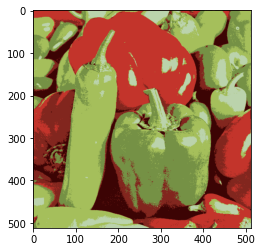

In [14]:
def kmeans(image,k):
    row,col,ch = image.shape
    kmeans_image = image.astype('double')
    n = row*col
    x = kmeans_image.reshape((n,3)) # R G B만 고려하기 위해 reshape
    z = np.zeros((k,3),dtype='int') # k centroids
    for i in range(k):
        rand = np.random.randint(0,n)
        z[i,:] = x[rand,:] # 군집 초기화
    print(z)
    x_index = np.zeros(n)
    x_before = np.zeros(n)
    distance = np.zeros(k)
    a = 0
    while True:
        print(a)
        # 각 픽셀과 모든 군집 간 거리 구하고 최소 거리의 군집에 할당
        for i in range(n):
            for j in range(k):
                distance[j] = np.sqrt(np.sum((x[i,:] - z[j,:])**2)) # 거리 계산
            x_index[i] = np.argmin(distance) # 최소 거리를 해당 군집으로 배정

        #이전과 똑같으면 종료
        if (np.sum(~(x_index == x_before)) < 10):
            break;
        x_before = x_index + 0

        # mean값 구하고 군집 이동
        for i in range(k):
            xii = np.where(x_index == i)    
            sumr,sumg,sumb = 0,0,0
            for j in range(np.size(xii[0])):
                sumr += x[xii[0][j],0]
                sumg += x[xii[0][j],1]
                sumb += x[xii[0][j],2]
            z[i,0],z[i,1],z[i,2] = sumr/np.size(xii[0]),sumg/np.size(xii[0]),sumb/np.size(xii[0])
        print(z)
        a = a+1

    # 군집 대표 RGB로 속한 픽셀 모두 채우기
    x = x.reshape((row,col,3))
    x_index = x_index.reshape((row,col))
    for i in range(k):
        xii = np.where(x_index == i)
        for j in range(np.size(xii[0])):
            kmeans_image[xii[0][j],xii[1][j],0] = z[i,0]
            kmeans_image[xii[0][j],xii[1][j],1] = z[i,1]
            kmeans_image[xii[0][j],xii[1][j],2] = z[i,2]
    kmeans_image = kmeans_image.astype('uint8')
    return kmeans_image

image = cv2.imread(impath2) #image read
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kmeans_image = kmeans(image,6)
plt.imshow(kmeans_image)

In [13]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6]])
print(np.sum(~(a == b)))

0
